In [1]:
import Pkg; 
Pkg.add("BenchmarkTools")
Pkg.add("Plots")
Pkg.add("OrderedCollections")
Pkg.add("Latexify")

include("./modules.jl")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


Main.CouplingConstants

In [2]:
using LinearAlgebra
using Printf
using Plots
using .MakeGraph
using .BinaryBasisFermions
using .CouplingConstants

In [294]:
m=10
g = loopNN(m)   # generate a ring (vector of bonds)
#pop!.(g)         # open boundaries
phs = [1 for i in 1:m]   
#phs = [(-1)^i for i in 1:m]   #  gauge change 1-> -1 on odd sites
#phs = phase(m)           # random gauge
elements = Graph2elements(g, 1)    # generate a list of h_ij -> (i,j,h)
h=MatrixGen(elements,m,phs)   # generate m x m matrix with elements h_ij*exp[i(phs_i-phs_j)]

10×10 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  1
 1  0  1  0  0  0  0  0  0  0
 0  1  0  1  0  0  0  0  0  0
 0  0  1  0  1  0  0  0  0  0
 0  0  0  1  0  1  0  0  0  0
 0  0  0  0  1  0  1  0  0  0
 0  0  0  0  0  1  0  1  0  0
 0  0  0  0  0  0  1  0  1  0
 0  0  0  0  0  0  0  1  0  1
 1  0  0  0  0  0  0  0  1  0

In [266]:
map(x->round(x,sigdigits=5),eigvals(Complex.(h)))
#eigen(Complex.(h).vectors

10-element Vector{Float64}:
 -2.0
 -1.618
 -1.618
 -0.61803
 -0.61803
  0.61803
  0.61803
  1.618
  1.618
  2.0

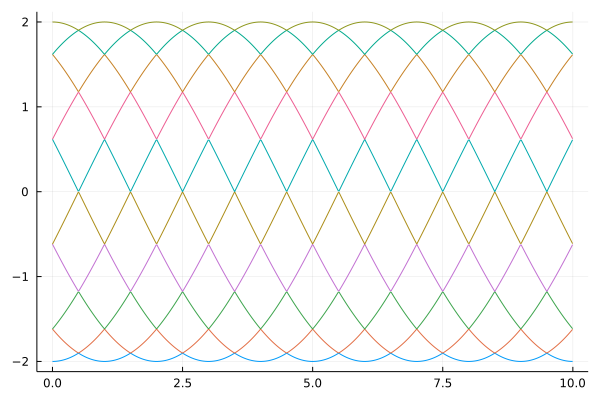

In [295]:
x=0:0.01:2*pi                # spectrum as a function of 0<delta<0.1
function spectrum(x::Real)    # loop through a parameter x and calculate spectra of h(x)
    phs = [1 for i in 1:m]
    a=exp(im*x)
    elements = Graph2elements(g,a)
    h=MatrixGen(elements,m,phs)  
    y=real.(eigvals(Complex.(h)))
end
y=reduce(hcat,map(spectrum,x))'
plot(m*x/(2*pi),y,legend = false)

In [145]:
function Graph2elements(graph::Vector{Vector{Tuple{Int,Int}}}, ts::T) where T<:Number
    x=Vector{Tuple{Int,Int,T}}()
    i=0
    for sub in graph
        i +=1
        if i <= length(ts) 
            for bond in sub
                push!(x,(bond[1],bond[2],ts))
                push!(x,(bond[2],bond[1],conj(ts)))
            end
        end
    end
    return x
end

function MatrixGen(elements::Vector{Tuple{Int64, Int64, U}}, M::Int, phase::Vector{T}) where {U,T<:Number}
     out = zeros(typejoin(U,T),M,M)
#     out = zeros(Complex,M,M)
    for x in elements
       out[x[1],x[2]] += x[3]*phase[x[1]]*conj(phase[x[2]])
    end
    return out
end

function phase(N::Int)
    out=Vector{Complex}()
    for i in 1:N
        push!(out,exp(im*rand(Float64)*2*pi))
    end
    return out
end

MatrixGen (generic function with 2 methods)